In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import datetime
import matplotlib.dates as mdates

In [18]:
df = pd.read_csv('R:/OwnCloud/WetScapes/2020_04_30_BGS_paper/Daten/DWDData_merged.csv')

In [19]:
df.head()

,timestamp,atemp,relhum,rgmin,rghourly,rg,prec
0,1991-11-13 18:00:00,NaN,NaN,NaN,NaN,NaN,0.0
1,1991-11-13 18:30:00,7.350000,71.000000,NaN,NaN,NaN,0.0
2,1991-11-13 19:00:00,7.133333,73.000000,NaN,NaN,NaN,0.0
3,1991-11-13 19:30:00,7.066667,74.666667,NaN,NaN,NaN,0.0
4,1991-11-13 20:00:00,6.900000,75.000000,NaN,NaN,NaN,0.0


In [20]:
df['date'] = pd.to_datetime(df['timestamp'])
data = df.loc[:, ['prec']]
data = data.set_index(df.date)
data['prec'] = pd.to_numeric(data['prec'],downcast='float',errors='coerce')

In [21]:
data.head()

,prec
date,
1991-11-13 18:00:00,0.0
1991-11-13 18:30:00,0.0
1991-11-13 19:00:00,0.0
1991-11-13 19:30:00,0.0
1991-11-13 20:00:00,0.0


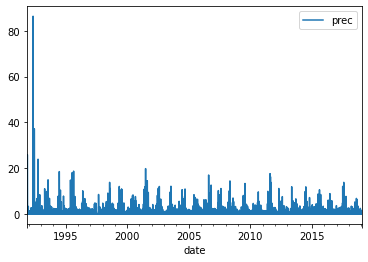

In [22]:
data.plot()
plt.show()

In [23]:
#umrechnen in Tageswerte

daily = data.resample('D').sum()
print(daily.head())


            prec
date            
1991-11-13   0.0
1991-11-14   0.1
1991-11-15   0.0
1991-11-16   0.0
1991-11-17   0.6


In [24]:
series = pd.Series(daily['prec'])
# 2012 ist ein schaltjahr --> 29.2.2012 wir rausgelöscht

#help(series)

test3 = series.loc['1999-01-01':'2000-02-28']
test4 = series.loc['2000-03-01':'2004-02-28']
test5 = series.loc['2004-03-01':'2008-02-28']
test6 = series.loc['2008-03-01':'2012-02-28']
test7 = series.loc['2012-03-01':'2016-02-28']
test8 = series.loc['2016-03-01':'2018-12-31']

series_ = pd.concat([
    #test1,
    #test2,
    test3,test4,test5,test6,test7,test8])




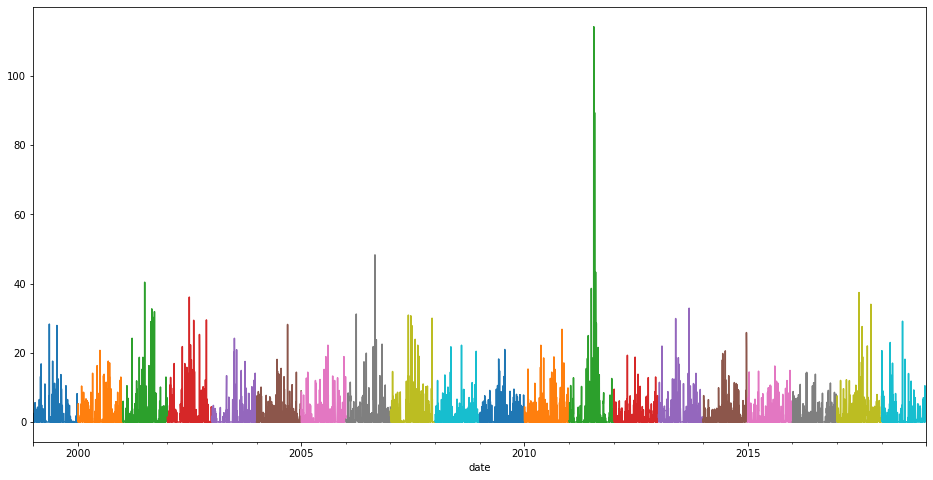

In [25]:
groups = series_.groupby(pd.Grouper(freq='A'))
groups.plot(figsize=(16,8))

#plt.savefig('R:\\OwnCloud\\WetScapes\\2019_03_31_ERL_paper\\Artikel_ERL\\figures\\Niederschlag2009-18_absolut.png', dpi=300, quality=95, format="png")
plt.show()


In [26]:
groups.count()

date
1999-12-31    365
2000-12-31    365
2001-12-31    365
2002-12-31    365
2003-12-31    365
2004-12-31    365
2005-12-31    365
2006-12-31    365
2007-12-31    365
2008-12-31    365
2009-12-31    365
2010-12-31    365
2011-12-31    365
2012-12-31    365
2013-12-31    365
2014-12-31    365
2015-12-31    365
2016-12-31    365
2017-12-31    365
2018-12-31    365
Freq: A-DEC, Name: prec, dtype: int64

In [27]:
ann_prec = {}
for name,group in groups:
    ann_prec[name.year] = group.sum().round()


ann_prec

{1999: 508.0,
 2000: 593.0,
 2001: 751.0,
 2002: 759.0,
 2003: 457.0,
 2004: 572.0,
 2005: 563.0,
 2006: 682.0,
 2007: 786.0,
 2008: 520.0,
 2009: 539.0,
 2010: 706.0,
 2011: 955.0,
 2012: 489.0,
 2013: 611.0,
 2014: 553.0,
 2015: 611.0,
 2016: 479.0,
 2017: 746.0,
 2018: 457.0}

In [69]:
print('Mean prec without 2018: {} mm'.format(np.array(list(ann_prec.values())[:-1]).mean()))
print('STD prec without 2018: {} mm'.format(np.array(list(ann_prec.values())[:-1]).std()))
print('difference between 2018 and refence range: {} mm'.format(list(ann_prec.values())[-1]-np.array(list(ann_prec.values())[:-1]).mean()))


Mean prec without 2018: 625.26318359375 mm
STD prec without 2018: 127.010498046875 mm
difference between 2018 and refence range: -168.26318359375 mm


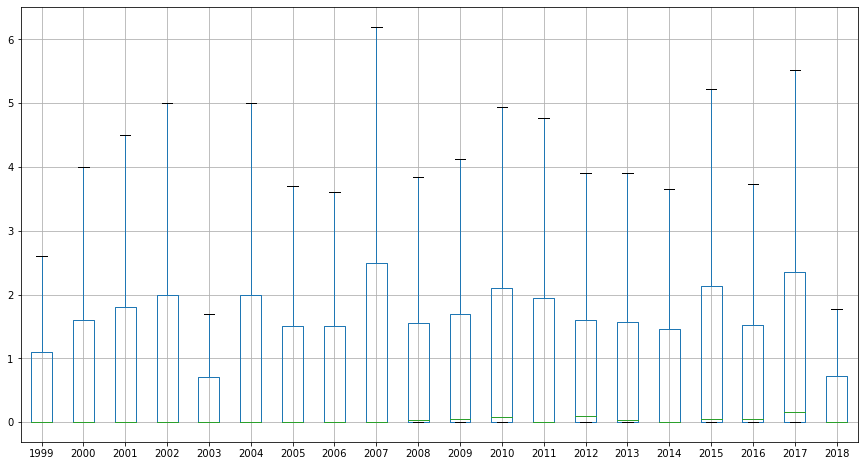

In [28]:
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values

years.boxplot(showfliers=False, figsize=(15,8))

#plt.savefig('R:\\OwnCloud\\WetScapes\\2019_03_31_ERL_paper\\Artikel_ERL\\figures\\Niederschlag2009-18_boxplot.png', dpi=300, quality=95, format="png")
plt.show()


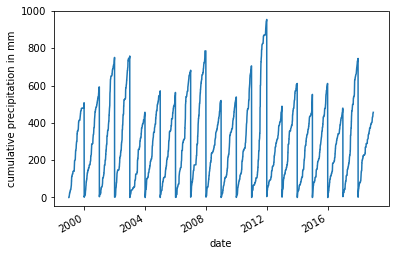

In [29]:
# daily = tagessummen von precipitation

# data_2009_2019 = halbstündige werte

# series_ Schaltjahr-bereinigt 


groups.cumsum().plot()

plt.ylabel('cumulative precipitation in mm')
plt.show()

In [30]:
prec_1999 = daily.loc['1999-01-01': '1999-12-31']
prec_2000 = daily.loc['2000-01-01': '2000-12-31']
prec_2001 = daily.loc['2001-01-01': '2001-12-31']
prec_2002 = daily.loc['2002-01-01': '2002-12-31']
prec_2003 = daily.loc['2003-01-01': '2003-12-31']
prec_2004 = daily.loc['2004-01-01': '2004-12-31']
prec_2005 = daily.loc['2005-01-01': '2005-12-31']
prec_2006 = daily.loc['2006-01-01': '2006-12-31']
prec_2007 = daily.loc['2007-01-01': '2007-12-31']
prec_2008 = daily.loc['2008-01-01': '2008-12-31']
prec_2009 = daily.loc['2009-01-01': '2009-12-31']
prec_2010 = daily.loc['2010-01-01': '2010-12-31']
prec_2011 = daily.loc['2011-01-01': '2011-12-31']
prec_2012 = daily.loc['2012-01-01': '2012-12-31']
prec_2013 = daily.loc['2013-01-01': '2013-12-31']
prec_2014 = daily.loc['2014-01-01': '2014-12-31']
prec_2015 = daily.loc['2015-01-01': '2015-12-31']
prec_2016 = daily.loc['2016-01-01': '2016-12-31']
prec_2017 = daily.loc['2017-01-01': '2017-12-31']
prec_2018 = daily.loc['2018-01-01': '2018-12-31']

prec_1999 = prec_1999.reset_index()
prec_2000 = prec_2000.reset_index()
prec_2001 = prec_2001.reset_index()
prec_2002 = prec_2002.reset_index()
prec_2003 = prec_2003.reset_index()
prec_2004 = prec_2004.reset_index()
prec_2005 = prec_2005.reset_index()
prec_2006 = prec_2006.reset_index()
prec_2007 = prec_2007.reset_index()
prec_2008 = prec_2008.reset_index()
prec_2009 = prec_2009.reset_index()
prec_2010 = prec_2010.reset_index()
prec_2011 = prec_2011.reset_index()
prec_2012 = prec_2012.reset_index()
prec_2013 = prec_2013.reset_index()
prec_2014 = prec_2014.reset_index()
prec_2015 = prec_2015.reset_index()
prec_2016 = prec_2016.reset_index()
prec_2017 = prec_2017.reset_index()
prec_2018 = prec_2018.reset_index()


merge_table = pd.DataFrame()
merge_table['1999'] = prec_1999['prec']
merge_table['2000'] = prec_2000['prec']
merge_table['2001'] = prec_2001['prec']
merge_table['2002'] = prec_2002['prec']
merge_table['2003'] = prec_2003['prec']
merge_table['2004'] = prec_2004['prec']
merge_table['2005'] = prec_2005['prec']
merge_table['2006'] = prec_2006['prec']
merge_table['2007'] = prec_2007['prec']
merge_table['2008'] = prec_2008['prec']
merge_table['2009'] = prec_2009['prec']
merge_table['2010'] = prec_2010['prec']
merge_table['2011'] = prec_2011['prec']
merge_table['2012'] = prec_2012['prec']
merge_table['2013'] = prec_2013['prec']
merge_table['2014'] = prec_2014['prec']
merge_table['2015'] = prec_2015['prec']
merge_table['2016'] = prec_2016['prec']
merge_table['2017'] = prec_2017['prec']
merge_table['2018'] = prec_2018['prec']

merge_table.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,0.0,1.7,4.0,1.4,0.0,0.0,0.0,0.8,1.9,2.1,0.00,0.45,0.37,4.67,2.04,0.00,0.00,0.0,4.49,1.770000
1,0.0,0.0,3.4,0.2,0.9,0.0,8.7,0.0,3.5,0.0,0.22,4.41,0.00,3.11,1.19,0.92,2.69,0.0,0.14,0.290000
2,0.1,0.0,0.5,0.0,1.7,0.0,1.9,0.0,2.5,0.0,2.70,0.03,0.00,7.90,2.53,0.00,6.96,0.0,7.54,20.619999
3,1.3,5.3,0.0,0.0,0.1,0.0,3.7,0.0,3.3,0.0,1.82,0.42,0.00,3.16,7.08,0.45,0.00,0.0,1.00,3.090000
4,2.5,0.5,6.0,0.0,3.9,0.0,0.1,0.0,1.4,0.6,0.40,0.00,0.00,9.49,0.00,0.49,4.96,0.0,0.05,4.640000


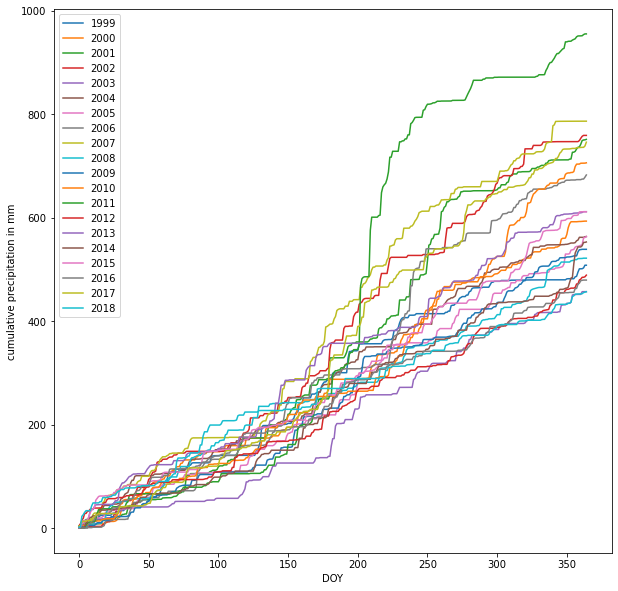

In [31]:
merge_table.cumsum().plot(figsize=[10,10])
plt.ylabel('cumulative precipitation in mm')
plt.xlabel('DOY')
#plt.savefig('R:\\OwnCloud\\WetScapes\\2019_03_31_ERL_paper\\Artikel_ERL\\figures\\prec_cumsum.png', dpi=300, quality=95, format="png")
plt.show()

In [32]:
merge_table_99_17 = merge_table.copy()
merge_table_99_17 = merge_table_99_17.drop(columns=['2018'])
merge_table_99_17.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0.0,1.7,4.0,1.4,0.0,0.0,0.0,0.8,1.9,2.1,0.00,0.45,0.37,4.67,2.04,0.00,0.00,0.0,4.49
1,0.0,0.0,3.4,0.2,0.9,0.0,8.7,0.0,3.5,0.0,0.22,4.41,0.00,3.11,1.19,0.92,2.69,0.0,0.14
2,0.1,0.0,0.5,0.0,1.7,0.0,1.9,0.0,2.5,0.0,2.70,0.03,0.00,7.90,2.53,0.00,6.96,0.0,7.54
3,1.3,5.3,0.0,0.0,0.1,0.0,3.7,0.0,3.3,0.0,1.82,0.42,0.00,3.16,7.08,0.45,0.00,0.0,1.00
4,2.5,0.5,6.0,0.0,3.9,0.0,0.1,0.0,1.4,0.6,0.40,0.00,0.00,9.49,0.00,0.49,4.96,0.0,0.05


In [33]:
merge_table_99_17_cumsum = merge_table_99_17.cumsum()
merge_table_99_17_cumsum.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0.0,1.7,4.0,1.4,0.0,0.0,0.000000,0.8,1.9,2.1,0.00,0.45,0.37,4.67,2.04,0.00,0.00,0.0,4.49
1,0.0,1.7,7.4,1.6,0.9,0.0,8.700000,0.8,5.4,2.1,0.22,4.86,0.37,7.78,3.23,0.92,2.69,0.0,4.63
2,0.1,1.7,7.9,1.6,2.6,0.0,10.599999,0.8,7.9,2.1,2.92,4.89,0.37,15.68,5.76,0.92,9.65,0.0,12.17
3,1.4,7.0,7.9,1.6,2.7,0.0,14.299999,0.8,11.2,2.1,4.74,5.31,0.37,18.84,12.84,1.37,9.65,0.0,13.17
4,3.9,7.5,13.9,1.6,6.6,0.0,14.400000,0.8,12.6,2.7,5.14,5.31,0.37,28.33,12.84,1.86,14.61,0.0,13.22


In [34]:
merge_table_18 = pd.DataFrame()
merge_table_18['2018'] = merge_table['2018']
print(merge_table_18.head())

merge_table_18_cumsum = merge_table_18.cumsum()
merge_table_18_cumsum.head()

        2018
0   1.770000
1   0.290000
2  20.619999
3   3.090000
4   4.640000


,2018
0,1.770000
1,2.060000
2,22.679998
3,25.769999
4,30.409998


In [35]:
merge_table_99_17_cumsum['max'] = merge_table_99_17_cumsum.max(axis=1)
merge_table_99_17_cumsum['min'] = merge_table_99_17_cumsum.min(axis=1)

merge_table_99_17_cumsum.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,max,min
0,0.0,1.7,4.0,1.4,0.0,0.0,0.000000,0.8,1.9,2.1,...,0.45,0.37,4.67,2.04,0.00,0.00,0.0,4.49,4.67,0.0
1,0.0,1.7,7.4,1.6,0.9,0.0,8.700000,0.8,5.4,2.1,...,4.86,0.37,7.78,3.23,0.92,2.69,0.0,4.63,8.70,0.0
2,0.1,1.7,7.9,1.6,2.6,0.0,10.599999,0.8,7.9,2.1,...,4.89,0.37,15.68,5.76,0.92,9.65,0.0,12.17,15.68,0.0
3,1.4,7.0,7.9,1.6,2.7,0.0,14.299999,0.8,11.2,2.1,...,5.31,0.37,18.84,12.84,1.37,9.65,0.0,13.17,18.84,0.0
4,3.9,7.5,13.9,1.6,6.6,0.0,14.400000,0.8,12.6,2.7,...,5.31,0.37,28.33,12.84,1.86,14.61,0.0,13.22,28.33,0.0


In [36]:
prec_cum = pd.DataFrame()
prec_cum['2018'] = merge_table_18_cumsum['2018']
prec_cum['min'] = merge_table_99_17_cumsum['min']
prec_cum['max'] = merge_table_99_17_cumsum['max']
prec_cum.head()

,2018,min,max
0,1.770000,0.0,4.67
1,2.060000,0.0,8.70
2,22.679998,0.0,15.68
3,25.769999,0.0,18.84
4,30.409998,0.0,28.33


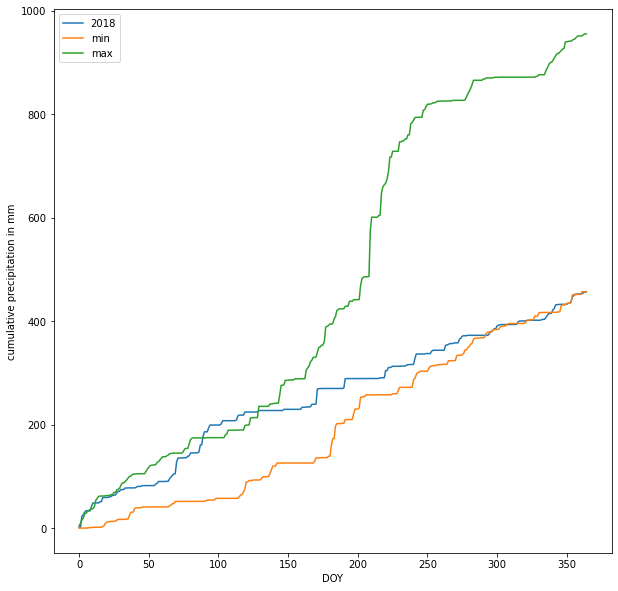

In [37]:
prec_cum.plot(figsize=[10,10])
plt.ylabel('cumulative precipitation in mm')
plt.xlabel('DOY')
plt.show()

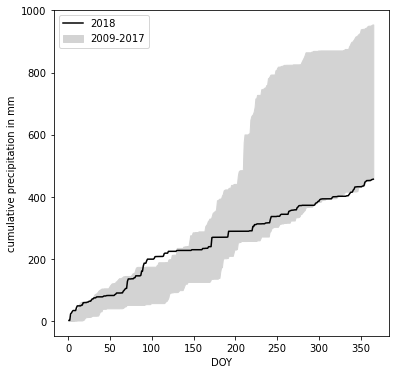

In [38]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes()

x = np.arange(1,366)
ax.plot(x, prec_cum['2018'], color='black', label='2018');
ax.fill_between(x, prec_cum['min'], prec_cum['max'], color='lightgray', label='2009-2017')

ax.legend(loc='upper left')

ax.set_ylabel('cumulative precipitation in mm')
ax.set_xlabel('DOY')

#plt.savefig('R:\\OwnCloud\\WetScapes\\2019_03_31_ERL_paper\\ArtikelERL_english\\figures\\prec_cumsum_area.png', dpi=300, quality=95, format="png")

plt.show()

In [39]:
merge_table_99_17_cumsum_without = merge_table_99_17_cumsum.drop(columns=['min','max'])
merge_table_99_17_cumsum_without.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0.0,1.7,4.0,1.4,0.0,0.0,0.000000,0.8,1.9,2.1,0.00,0.45,0.37,4.67,2.04,0.00,0.00,0.0,4.49
1,0.0,1.7,7.4,1.6,0.9,0.0,8.700000,0.8,5.4,2.1,0.22,4.86,0.37,7.78,3.23,0.92,2.69,0.0,4.63
2,0.1,1.7,7.9,1.6,2.6,0.0,10.599999,0.8,7.9,2.1,2.92,4.89,0.37,15.68,5.76,0.92,9.65,0.0,12.17
3,1.4,7.0,7.9,1.6,2.7,0.0,14.299999,0.8,11.2,2.1,4.74,5.31,0.37,18.84,12.84,1.37,9.65,0.0,13.17
4,3.9,7.5,13.9,1.6,6.6,0.0,14.400000,0.8,12.6,2.7,5.14,5.31,0.37,28.33,12.84,1.86,14.61,0.0,13.22


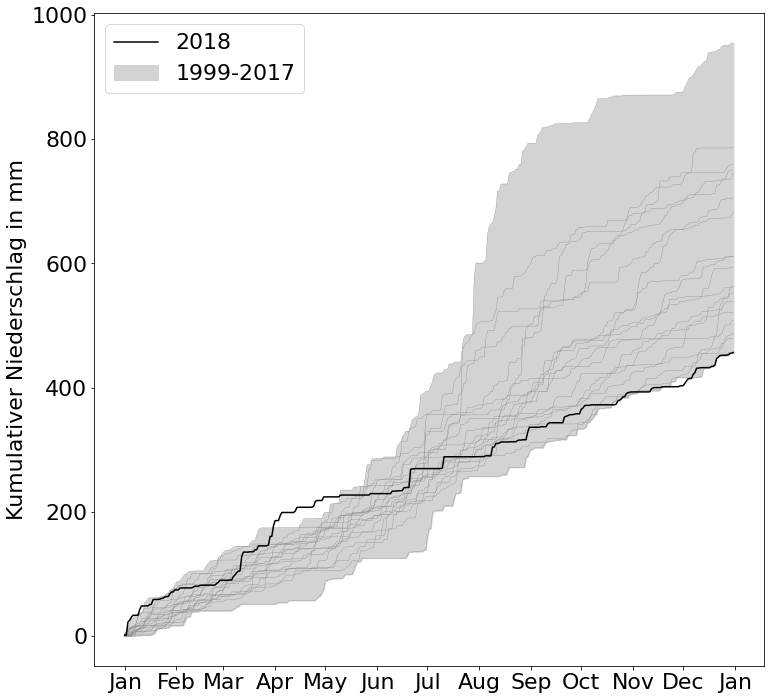

In [41]:
# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

plt.rcParams.update({'font.size': 22})


fig = plt.figure(figsize=(12,12))
ax = plt.axes()

numdays = 365
base = datetime.datetime(2018, 1, 1, 0, 0, 0, 0)
x = [base + datetime.timedelta(days=x) for x in range(0,numdays)]


ax.fill_between(x, prec_cum['min'], prec_cum['max'], color='lightgray', label='1999-2017')
ax.plot(x, merge_table_99_17_cumsum_without, color='grey', linewidth=0.3)
ax.plot(x, prec_cum['2018'], color='black', label='2018');
ax.legend(loc='upper left')

ax.set_ylabel('Kumulativer Niederschlag in mm')
#ax.set_xlabel('DOY')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)

plt.savefig('R:/OwnCloud/DissBeyer/Diss2020/Arbeit/Abbildungen/05_Ergebnisse/paw_niederschlag.png', dpi=300, quality=95, format="png")

plt.show()